In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',None)

In [4]:
df=pd.read_csv('Customer_Churn.csv')
df.head(8)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No


Here we have to predict the churn rate which are having values of Yes and No. So, here we need to use the logistic and classifiers models to predict our result.

In [5]:
df.shape

(7043, 21)

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Lot of object columns are present, we need to convert them later into numerical data.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<AxesSubplot:>

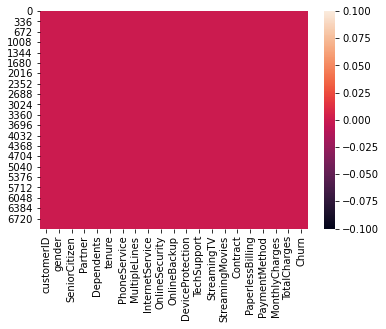

In [11]:
sns.heatmap(df.isnull())

In [12]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
import matplotlib.pyplot as plt

Text(0.5, 1.02, 'Target count Category Wise')

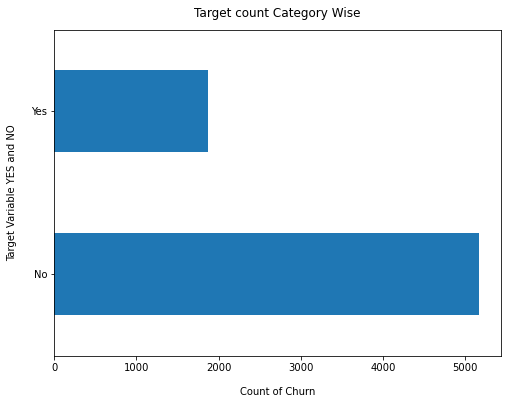

In [15]:
df['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count of Churn", labelpad=14)
plt.ylabel("Target Variable YES and NO", labelpad=14)
plt.title("Target count Category Wise", y=1.02)

In [17]:
import seaborn as sns

In [18]:
100*df['Churn'].value_counts()/len(df['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

Output in the above calculation is not balanced,i.e. Yes is aound 27 and No is around 73.

We will drop the customer ID as it is of no use in churn prediction

In [19]:
df.drop('customerID', axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


We need to convert TotalCharges from object to numerical.

In [20]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors="coerce")

In [21]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

As we can see null values are present in Total Charges column, we will drop all the rows having null values as it is very less and will not affect our data.

In [22]:
df.drop(df[df['TotalCharges'].isnull()].index, inplace=True)

In [23]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [24]:
df.shape

(7032, 20)

In [25]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


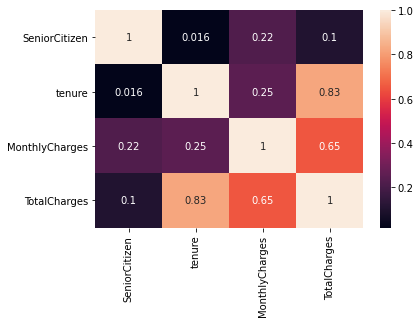

In [26]:
sns.heatmap(df.corr(), annot=True)
plt.show()

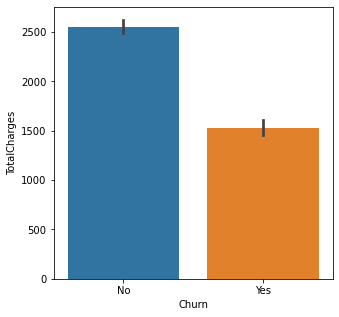

In [27]:
plt.figure(figsize=(5, 5))
sns.barplot(data = df, y="TotalCharges", x="Churn")
plt.show()

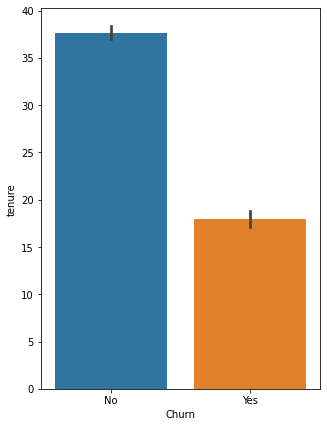

In [28]:
plt.figure(figsize=(5, 7))
sns.barplot(data = df, x="Churn", y="tenure")
plt.show()

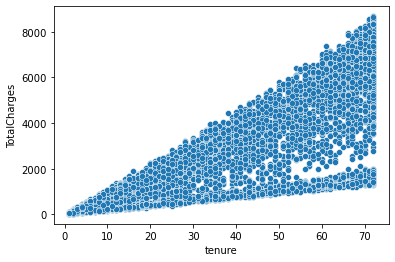

In [29]:
sns.scatterplot(data=df, x="tenure", y="TotalCharges")
plt.show()

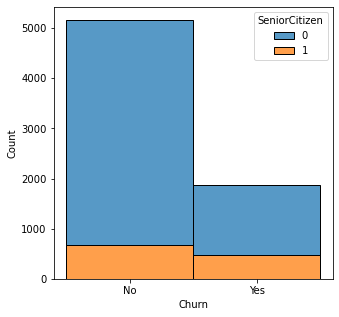

In [30]:
plt.figure(figsize=(5,5))
sns.histplot(data=df,  x="Churn", hue='SeniorCitizen',multiple="stack" )
plt.show()

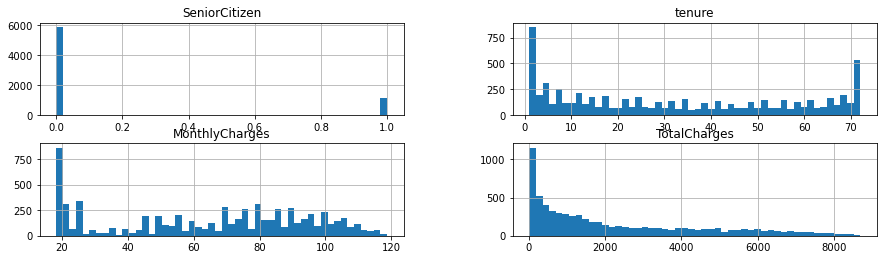

In [31]:
df.hist(bins=50, figsize=(15,15),grid=True, layout=(7,2))
plt.show()

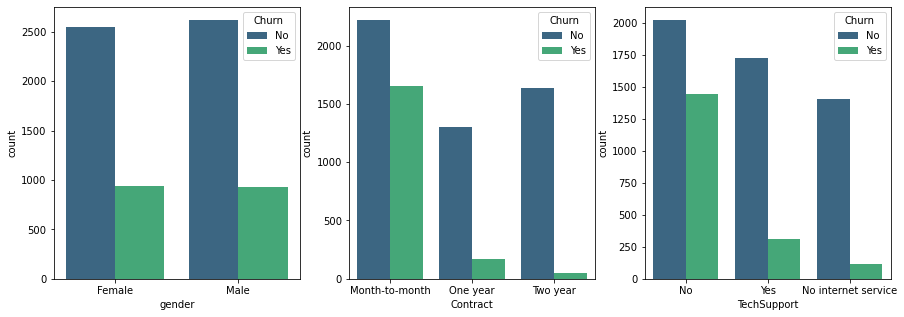

In [32]:
fig, axes = plt.subplots(1,3, figsize=(15,5))
sns.countplot(x='gender', hue='Churn', palette='viridis', data=df, ax=axes[0])
sns.countplot(x='Contract', hue='Churn', palette='viridis', data=df, ax=axes[1])
sns.countplot(x='TechSupport', hue='Churn', palette='viridis', data=df, ax=axes[2])
plt.show()

Now, we will replace the big sentence into small one i.e NO

In [33]:
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

In [34]:
categorical_data = df.select_dtypes(include=['object'])
print(categorical_data.columns)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


In [35]:
df.skew()

SeniorCitizen     1.831103
tenure            0.237731
MonthlyCharges   -0.222103
TotalCharges      0.961642
dtype: float64

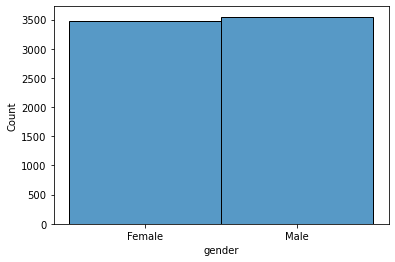

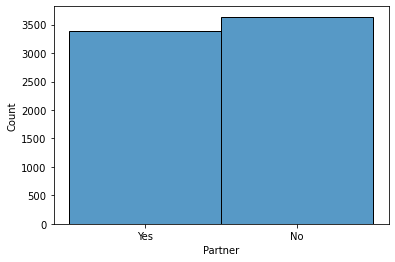

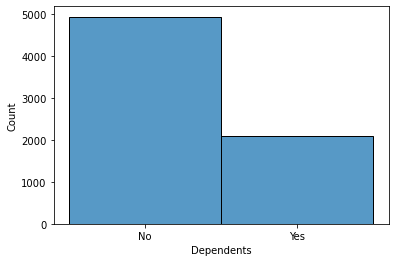

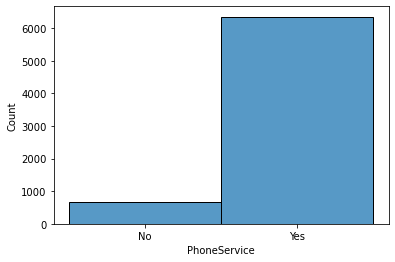

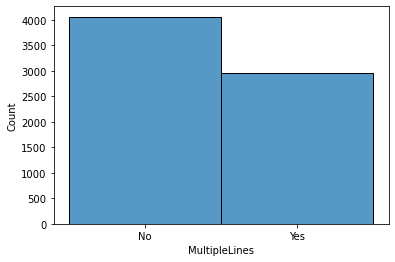

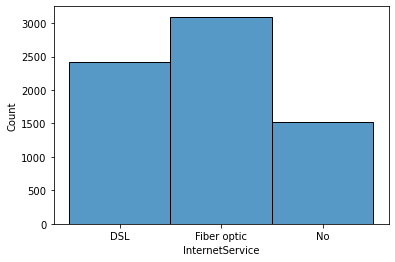

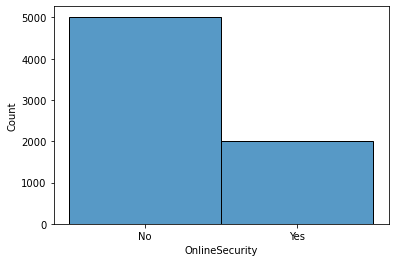

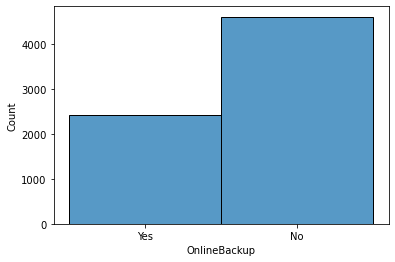

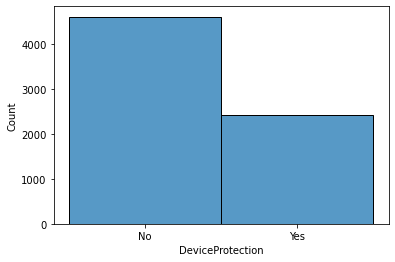

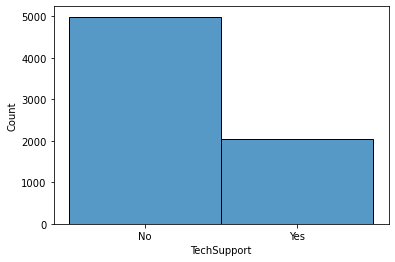

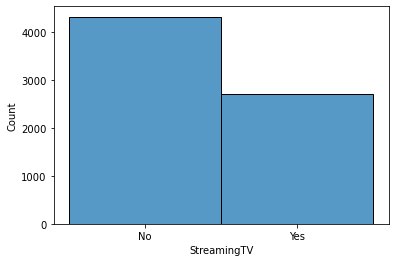

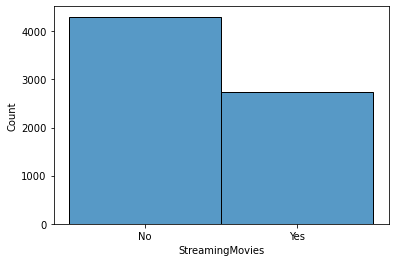

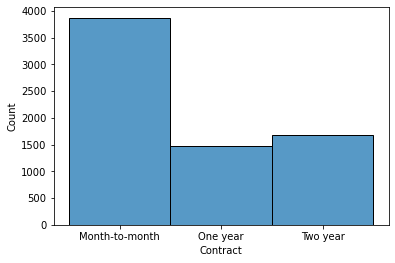

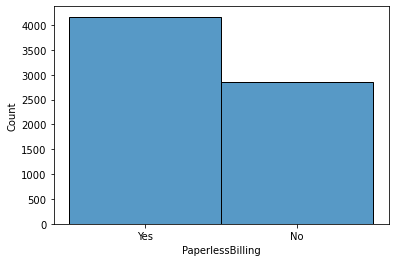

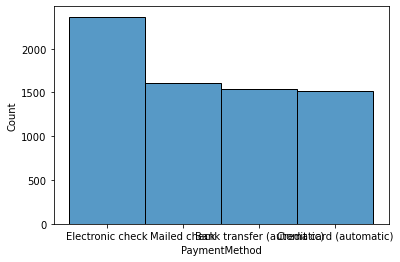

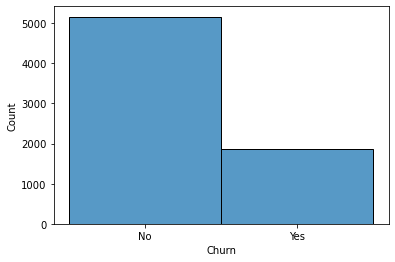

In [36]:
for i in categorical_data:
  sns.histplot(df[i])
  plt.show()

In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

list1=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,0,1,0,1,1,1,1,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,0,0,1,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [38]:
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [40]:
x=df.iloc[:,0:-1]
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,0,1,0,1,1,1,1,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,0,0,1,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [41]:
y=df.iloc[:,-1]
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [42]:
from imblearn.over_sampling import SMOTE

In [43]:
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [44]:
y.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

gender                 AxesSubplot(0.125,0.772143;0.110714x0.107857)
SeniorCitizen       AxesSubplot(0.257857,0.772143;0.110714x0.107857)
Partner             AxesSubplot(0.390714,0.772143;0.110714x0.107857)
Dependents          AxesSubplot(0.523571,0.772143;0.110714x0.107857)
tenure              AxesSubplot(0.656429,0.772143;0.110714x0.107857)
PhoneService        AxesSubplot(0.789286,0.772143;0.110714x0.107857)
MultipleLines          AxesSubplot(0.125,0.642714;0.110714x0.107857)
InternetService     AxesSubplot(0.257857,0.642714;0.110714x0.107857)
OnlineSecurity      AxesSubplot(0.390714,0.642714;0.110714x0.107857)
OnlineBackup        AxesSubplot(0.523571,0.642714;0.110714x0.107857)
DeviceProtection    AxesSubplot(0.656429,0.642714;0.110714x0.107857)
TechSupport         AxesSubplot(0.789286,0.642714;0.110714x0.107857)
StreamingTV            AxesSubplot(0.125,0.513286;0.110714x0.107857)
StreamingMovies     AxesSubplot(0.257857,0.513286;0.110714x0.107857)
Contract            AxesSubplot(0.

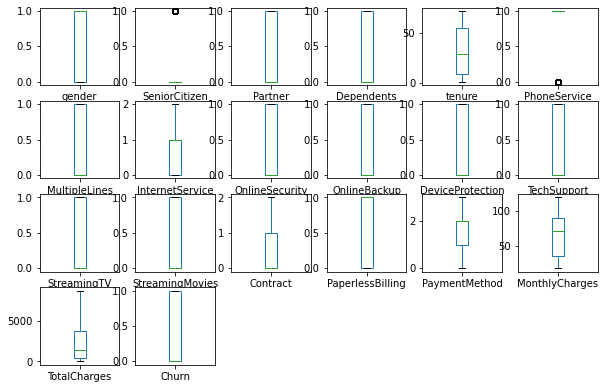

In [46]:
df.plot(kind='box',subplots=True,layout=(6,6),figsize=(10,10))

Removing Outliers using Zscore

In [47]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z

array([[1.00943013, 0.44032709, 1.03561683, ..., 1.16169394, 0.99419409,
        0.60166339],
       [0.99065797, 0.44032709, 0.9656081 , ..., 0.26087792, 0.17373982,
        0.60166339],
       [0.99065797, 0.44032709, 0.9656081 , ..., 0.36392329, 0.95964911,
        1.66205891],
       ...,
       [1.00943013, 0.44032709, 1.03561683, ..., 1.17000405, 0.85451414,
        0.60166339],
       [0.99065797, 2.27103902, 1.03561683, ..., 0.31916782, 0.87209546,
        1.66205891],
       [0.99065797, 0.44032709, 0.9656081 , ..., 1.35793167, 2.01234407,
        0.60166339]])

In [48]:
threshold=3
print(np.where(z>3))

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
        114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
        215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
        278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
        387,  398,  424,  431,  435,  452,  465,  481,  494,  497,  543,
        568,  595,  609,  615,  619,  633,  659,  666,  668,  673,  676,
        687,  715,  717,  734,  763,  774,  782,  788,  792,  811,  827,
        841,  845,  857,  864,  871,  873,  875,  882,  891,  915,  932,
        938,  940,  957,  970, 1008, 1015, 1034, 1047, 1048, 1050, 1069,
       1106, 1115, 1118, 1140, 1142, 1146, 1157, 1165, 1178, 1200, 1217,
       1221, 1238, 1251, 1253, 1267, 1274, 1294, 1307, 1322, 1327, 1329,
       1330, 1344, 1347, 1360, 1374, 1397, 1402, 1411, 1447, 1474, 1475,
       1476, 1495, 1501, 1508, 1514, 1555, 1557, 1576, 1579, 1609, 1615,
       1629, 1632, 1647, 1684, 1687, 1689, 1698, 1

In [49]:
df_new=df[(z<3).all(axis=1)]

In [50]:
df_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
5,0,0,0,0,8,1,1,1,0,0,1,0,1,1,0,1,2,99.65,820.50,1
6,1,0,0,1,22,1,1,1,0,1,0,0,1,0,0,1,1,89.10,1949.40,0


In [52]:
df_new.shape

(6352, 20)

In [63]:
df=df_new

Removing Skewness

In [74]:
x=df.iloc[:,0:-1]
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
5,0,0,0,0,8,1,1,1,0,0,1,0,1,1,0,1,2,99.65,820.50
6,1,0,0,1,22,1,1,1,0,1,0,0,1,0,0,1,1,89.10,1949.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0,0,0,0,72,1,0,2,0,0,0,0,0,0,2,1,0,21.15,1419.40
7038,1,0,1,1,24,1,1,0,1,0,1,1,1,1,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,1,103.20,7362.90
7041,1,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [75]:
y=df.iloc[:,-1]
y

1       0
2       1
4       1
5       1
6       0
       ..
7037    0
7038    0
7039    0
7041    1
7042    0
Name: Churn, Length: 6352, dtype: int64

In [64]:
from sklearn.preprocessing import power_transform

In [76]:
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.99309687, -0.44196502, -0.9714404 , ...,  1.3210264 ,
        -0.37521102,  0.22327844],
       [ 0.99309687, -0.44196502, -0.9714404 , ...,  1.3210264 ,
        -0.47663799, -1.39984543],
       [-1.00695111, -0.44196502, -0.9714404 , ...,  0.41287697,
         0.08287588, -1.26437932],
       ...,
       [-1.00695111, -0.44196502,  1.02939923, ..., -0.51867399,
         1.20939012,  1.52607251],
       [ 0.99309687,  2.26262248,  1.02939923, ...,  1.3210264 ,
         0.20822944, -0.94105004],
       [ 0.99309687, -0.44196502, -0.9714404 , ..., -1.48748641,
         1.29641414,  1.44405291]])

Scaling of the data

In [66]:
from sklearn.preprocessing import StandardScaler

In [77]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.99309687, -0.44196502, -0.9714404 , ...,  1.3210264 ,
        -0.37521102,  0.22327844],
       [ 0.99309687, -0.44196502, -0.9714404 , ...,  1.3210264 ,
        -0.47663799, -1.39984543],
       [-1.00695111, -0.44196502, -0.9714404 , ...,  0.41287697,
         0.08287588, -1.26437932],
       ...,
       [-1.00695111, -0.44196502,  1.02939923, ..., -0.51867399,
         1.20939012,  1.52607251],
       [ 0.99309687,  2.26262248,  1.02939923, ...,  1.3210264 ,
         0.20822944, -0.94105004],
       [ 0.99309687, -0.44196502, -0.9714404 , ..., -1.48748641,
         1.29641414,  1.44405291]])

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [69]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=45)

In [79]:
x_train.shape

(4446, 19)

In [80]:
x_test.shape

(1906, 19)

In [81]:
y_train.shape

(4446,)

In [82]:
lr=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
adc=AdaBoostClassifier()
gdc=GradientBoostingClassifier()

model=[lr,gnb,svc,dtc,knc,adc,gdc]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Predicted result value:',predm)
    print('actual value',y_test)
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Predicted result value: [1 0 0 ... 0 0 0]
actual value 4810    1
3017    0
3392    0
2925    0
5417    0
       ..
6089    1
2151    0
49      0
1653    0
4289    0
Name: Churn, Length: 1906, dtype: int64
0.8137460650577125
[[1270  118]
 [ 237  281]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1388
           1       0.70      0.54      0.61       518

    accuracy                           0.81      1906
   macro avg       0.77      0.73      0.75      1906
weighted avg       0.81      0.81      0.81      1906



Predicted result value: [1 0 0 ... 0 0 0]
actual value 4810    1
3017    0
3392    0
2925    0
5417    0
       ..
6089    1
2151    0
49      0
1653    0
4289    0
Name: Churn, Length: 1906, dtype: int64
0.7796432318992654
[[1106  282]
 [ 138  380]]
              precision    recall  f1-score   support

           0       0.89      0.80      0.84      1388
           1       0.57      0.73      0.64       518

    a

From above logistic and classifiers below are the accuracy percentage: logistic 81.37% GaussianNB 78% SVC 80.74% DecisionTreeClassifier 74% KNeighborsClassifier 78%, AdaBoost 81.21% ,GradientBoost 81.11%

So, out of these top three models are logistic, AdaBoost and GradientBoost. we will test CV score to confirm the accuracy score.

Cross Validation

In [83]:
from sklearn.model_selection import cross_val_score

In [84]:
lr=LogisticRegression()
adc=AdaBoostClassifier()
gdc=GradientBoostingClassifier()

model_cv=[lr,adc,gdc]

for i in model_cv:
    score=cross_val_score(i,x,y,cv=5)
    print(score)
    print (score.mean())
    print (score.std())

[0.81274587 0.80330448 0.79685039 0.80629921 0.80708661]
0.8052573149048738
0.0051961563691272
[0.81353265 0.80330448 0.80393701 0.7984252  0.80866142]
0.8055721516321082
0.005134356653271393
[0.81038552 0.8025177  0.79133858 0.80472441 0.79370079]
0.800533401066802
0.007068176699276294


n Cross validation also our scores are matching,and in this SVC model is performing best.

Now, we will try to improve accuracy using Hypermeter Tuning

Hypermeter Tuning

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
param_adc={'learning_rate':[0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]}
param_gdc={'learning_rate':[0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]}

modeladc=AdaBoostClassifier()
modelgdc=GradientBoostingClassifier()

In [91]:
gridadc=GridSearchCV(estimator=modeladc,param_grid=param_adc)
gridadc.fit(x,y)
print(gridadc)
print(gridadc.best_score_)
print(gridadc.best_estimator_)
print(gridadc.best_params_)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.05, 0.075, 0.1, 0.25, 0.5, 0.75,
                                           1]})
0.8055721516321082
AdaBoostClassifier(learning_rate=1)
{'learning_rate': 1}


In [92]:
gridgdc=GridSearchCV(estimator=modelgdc,param_grid=param_gdc)
gridgdc.fit(x,y)
print(gridgdc)
print(gridgdc.best_score_)
print(gridgdc.best_estimator_)
print(gridgdc.best_params_)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.05, 0.075, 0.1, 0.25, 0.5, 0.75,
                                           1]})
0.8027375059628168
GradientBoostingClassifier(learning_rate=0.05)
{'learning_rate': 0.05}


So, here our best learning rate comes out to be 1 for adaboost which is also a default one and 0.25 for gradient boosting. So, we will select the adaboost model and save the result that we have already got previously using default learning rate of "1".

In [93]:
import pickle
filename='Customer_Churn.pkl'
pickle.dump(adc, open(filename,'wb'))